In [229]:
import numpy as np
import pandas as pd
import os

In [230]:
from sklearn.model_selection import train_test_split

In [231]:
pathA = '/Users/gohitha/Desktop/CPSIL/sepsis-prediction/physionet.org/files/challenge-2019/1.0.0/training/training_setA'
pathB = '/Users/gohitha/Desktop/CPSIL/sepsis-prediction/physionet.org/files/challenge-2019/1.0.0/training/training_setB'

In [232]:
pos = []
neg = []
for psv in os.listdir(pathA):
    if psv.endswith('.psv'):
        filename = os.path.join(pathA, psv)
        ex = pd.read_csv(filename, sep='|')
        # print(ex.columns)
        if 1 in np.array(ex['SepsisLabel']):
            pos.append(filename)
        else:
            neg.append(filename)
            
for psv in os.listdir(pathB):
    if psv.endswith('.psv'):
        filename = os.path.join(pathB, psv)
        ex = pd.read_csv(filename, sep='|')
        # print(ex.columns)
        if 1 in np.array(ex['SepsisLabel']):
            pos.append(filename)
        else:
            neg.append(filename)

In [233]:
len(pos)

2932

In [234]:
len(neg)

37404

In [235]:
import random

In [236]:
random.shuffle(neg)
negs = neg[:10000]

In [237]:
len(negs)

10000

In [238]:
len(pos)

2932

In [239]:
data_files = negs + pos

In [240]:
len(data_files)

12932

In [241]:
random.shuffle(data_files)

In [242]:
data_dfs = [pd.read_csv(filename, sep='|') for filename in data_files]

In [243]:
data = pd.concat(data_dfs, ignore_index=True)

In [244]:
from preprocessing import plot_dataset

In [245]:
data.index[data['FiO2'] < 0].tolist()

[177574, 347577]

In [246]:
negvals = data.index[data['FiO2'] < 0].tolist()

In [247]:
for val in negvals:
    data.at[val, 'FiO2'] = np.nan

In [248]:
data['HospAdmTime'] = data['HospAdmTime'] * -1

In [249]:
data['FiO2'].describe()

count    56203.000000
mean         0.524910
std          0.195116
min          0.000000
25%          0.400000
50%          0.500000
75%          0.600000
max         10.000000
Name: FiO2, dtype: float64

In [250]:
largevals = data.index[data['FiO2'] > 6].tolist()
print(largevals)

[166193]


In [251]:
for val in largevals:
    data.at[val, 'FiO2'] = np.nan

In [252]:
data_skew = data.skew()
skew_1 = list(data_skew[data_skew.abs() > 1.2].index)

In [253]:
skew_1.remove('SepsisLabel')

In [254]:
skew_1.remove('SaO2')    

In [255]:
skew_1.remove('O2Sat')

In [256]:
for col in skew_1:
       data[col] = data[col].apply(lambda x: np.log(x+1) if pd.notnull(x) else x)

In [ ]:
plot_dataset(data.columns, data, 6)

In [ ]:
data_skew_2 = data.skew()
skew_2 = list(data_skew_2[data_skew_2.abs() > 1.2].index)

In [17]:
skew_2

NameError: name 'skew_2' is not defined

In [ ]:
skew_2.remove('O2Sat')

In [ ]:
skew_2.remove('SaO2')
skew_2.remove('SepsisLabel')

In [ ]:
skew_2

In [ ]:
plot_dataset(skew_2, data, 3)

In [ ]:
for col in skew_2:
    data[col] = data[col].apply(lambda x: np.log(x+1) if pd.notnull(x) else x)

In [ ]:
plot_dataset(data.columns, data, 6)

In [ ]:
skew_1

In [ ]:
skew_2

In [ ]:
train_neg, test_neg = train_test_split(negs, test_size=0.15, random_state=42)
train_pos, test_pos = train_test_split(pos, test_size=0.15, random_state=42)

In [ ]:
train_neg_dfs = [pd.read_csv(filename, sep='|') for filename in train_neg]
train_pos_dfs = [pd.read_csv(filename, sep='|') for filename in train_pos]

In [ ]:
trnneg = pd.concat(train_neg_dfs, ignore_index=True)
trnpos = pd.concat(train_pos_dfs, ignore_index=True)

In [ ]:
vitals = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2']

non_demo = [
    'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2', 
    'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 
    'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct', 
    'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium', 'Bilirubin_total', 
    'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC', 'Fibrinogen', 'Platelets'
]

labvals = [
    'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 
    'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Glucose', 'Lactate', 
    'Magnesium', 'Phosphate', 'Potassium', 'Bilirubin_total', 'Hct', 
    'Hgb', 'PTT', 'WBC', 'Platelets'
]

In [ ]:
trnpos['HospAdmTime'] = trnpos['HospAdmTime'] * -1
trnneg['HospAdmTime'] = trnneg['HospAdmTime'] * -1

In [ ]:
poslargevals = trnpos.index[trnpos['FiO2'] > 6].tolist()
print(poslargevals)

In [ ]:
posnegvals = trnpos.index[trnpos['FiO2'] < 0].tolist()
print(posnegvals)

In [ ]:
neglargevals = trnneg.index[trnneg['FiO2'] > 6].tolist()
print(neglargevals)

In [ ]:
negnegvals = trnneg.index[trnneg['FiO2'] < 0].tolist()
print(negnegvals)

In [ ]:
for val in neglargevals:
    print(trnneg.at[val, 'FiO2'])
    trnneg.at[val, 'FiO2'] = np.nan

In [ ]:
for val in negnegvals:
    print(trnneg.at[val, 'FiO2'])
    trnneg.at[val, 'FiO2'] = np.nan

In [ ]:
for val in posnegvals:
    print(trnpos.at[val, 'FiO2'])
    trnpos.at[val, 'FiO2'] = np.nan

In [ ]:
for col in skew_1:
    trnpos[col] = trnpos[col].apply(lambda x: np.log(x+1) if pd.notnull(x) else x)
    trnneg[col] = trnneg[col].apply(lambda x: np.log(x+1) if pd.notnull(x) else x)
    if col in skew_2:
        trnpos[col] = trnpos[col].apply(lambda x: np.log(x+1) if pd.notnull(x) else x)
        trnneg[col] = trnneg[col].apply(lambda x: np.log(x+1) if pd.notnull(x) else x)

In [ ]:
import preprocessing as pre

In [ ]:
for column in non_demo:
    trnpos[column] = pre.custom_impute(trnpos[column])
    trnneg[column] = pre.custom_impute(trnneg[column])

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def plot_dataset(columns, data, n_cols):  
    # Define the size of the grid
    n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate the required number of rows

    # Create a figure and a grid of subplots
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 4, n_rows * 3))  # Adjust the size as needed

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Plot a histogram on each subplot
    for ax, column in zip(axes, columns):
        ax.hist(data[column].dropna(), bins=30, alpha=0.7, color='blue')  # Drop NA for clean histogram plotting
        ax.set_title(column)
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

    # Hide any unused subplots if you have an uneven number of columns
    for ax in axes[len(columns):]:
        ax.axis('off')

    # Adjust layout to prevent overlap
    fig.tight_layout()

    # Display the plot
    plt.show()

def custom_impute(column):
    # Convert the series to a numpy array for easier manipulation
    values = column.values
    mean_value = np.nanmean(values)  # Compute mean ignoring NaN
    
    # Identify the index of the first non-NaN value
    first_valid_index = column.first_valid_index()
    
    # If the first entry itself is NaN, we need to handle initial NaN values
    if first_valid_index is not None:
        # Fill NaN values up to the first valid index with the mean
        values[:first_valid_index] = np.where(np.isnan(values[:first_valid_index]), mean_value, values[:first_valid_index])
        
    # Create a Series from the values to utilize pandas' fillna method for forward filling
    return pd.Series(values, index=column.index).fillna(method='ffill')

def differential_features(dataset, columns):
    temp_data = np.array(dataset)
    for column in columns:
        data = np.array(dataset[column])
        nanpos = np.where(~np.isnan(data))[0]
        diff = data.copy().astype(float)
        if len(nanpos) <= 1:
            diff[:] = np.nan
            temp_data = np.column_stack((temp_data, diff))
        else:
            diff[:nanpos[1]] = np.nan
            for p in range (1, len(nanpos)-1):
                diff[nanpos[p] : nanpos[p+1]] = data[nanpos[p]] - data[nanpos[p-1]]
            diff[nanpos[-1]:] = data[nanpos[-1]] - data[nanpos[-2]]
            temp_data = np.column_stack((temp_data, diff))
    return temp_data

def slide_window(data_arr, col_idx):
    """
    Calculate dynamic statistics in a six-hour sliding window
    :param data_arr: data after using a forward-filling strategy
    :param col_idx: selected features
    :return: time-series features
    """
    data = data_arr[:, col_idx]
    max_values = [[0 for col in range(len(data))]
                  for row in range(len(col_idx))]
    min_values = [[0 for col in range(len(data))]
                  for row in range(len(col_idx))]
    mean_values = [[0 for col in range(len(data))]
                   for row in range(len(col_idx))]
    median_values = [[0 for col in range(len(data))]
                   for row in range(len(col_idx))]
    std_values = [[0 for col in range(len(data))]
                   for row in range(len(col_idx))]
    diff_std_values = [[0 for col in range(len(data))]
                   for row in range(len(col_idx))]

    for i in range(len(data)):
        if i < 6:
            win_data = data[0:i + 1]
            for ii in range(6 - i):
                win_data = np.row_stack((win_data, data[i]))
        else:
            win_data = data[i - 6: i + 1]

        for j in range(len(col_idx)):
            dat = win_data[:, j]
            if len(np.where(~np.isnan(dat))[0]) == 0:
                max_values[j][i] = np.nan
                min_values[j][i] = np.nan
                mean_values[j][i] = np.nan
                median_values[j][i] = np.nan
                std_values[j][i] = np.nan
                diff_std_values[j][i] = np.nan
            else:
                max_values[j][i] = np.nanmax(dat)
                min_values[j][i] = np.nanmin(dat)
                mean_values[j][i] = np.nanmean(dat)
                median_values[j][i] = np.nanmedian(dat)
                std_values[j][i] = np.nanstd(dat)
                diff_std_values[j][i] = np.std(np.diff(dat))

    win_features = list(chain(max_values, min_values, mean_values,
                              median_values, std_values, diff_std_values))
    win_features = (np.array(win_features)).T

    return win_features

def feature_extract(dataset):
    labels = np.array(dataset['SepsisLabel'])
    data_prime = dataset.drop(columns=['Bilirubin_direct', 'TroponinI', 'Fibrinogen', 'SepsisLabel'])
    # obtain np array of dataset stacked with differential features
    data_with_diff = differential_features(data_prime, vitals + labvals)
    # 6 hour sliding window for ['HR', 'O2Sat', 'SBP', 'MAP', 'Resp'] = [0, 1, 3, 4, 6] in vitals
    print(data_with_diff.shape)
    # data_slide_win = slide_window(data_with_diff, [0, 1, 3, 4, 6])
    # features = np.column_stack((data_with_diff, data_slide_win))
    features = data_with_diff
    return features, labels

def process_data(dataset):
    features, labels = feature_extract(dataset)
    index = [i for i in range(len(labels))]
    np.random.shuffle(index)
    features = features[index]
    labels = labels[index]
    return features, labels

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, accuracy_score
import xgboost as xgb
from hyperopt import STATUS_OK, hp, fmin, tpe
import pandas as pd
import numpy as np

def downsample(dataset):
    x, y = process_data(dataset)
    index_0 = np.where(y == 0)[0]
    index_1 = np.where(y == 1)[0]
    
    index = index_0[len(index_1): -1]
    x_del = np.delete(x, index, 0)
    y_del = np.delete(y, index, 0)
    index = [i for i in range(len(y_del))]
    np.random.shuffle(index)
    x_del = x_del[index]
    y_del = y_del[index]
    
    return x_del, y_del

def hp_opt(x_train, y_train, x_val, y_val):
    train = xgb.DMatrix(x_train, label=y_train)
    val = xgb.DMatrix(x_val, label=y_val)
    x_val_D = xgb.DMatrix(x_val)
        
    def objective(params):
        xgb_model = xgb.train(params, dtrain=train, num_boost_round=1000, evals=[(val, 'eval')],
                              verbose_eval=False, early_stopping_rounds=80)
        y_vd_pred = xgb_model.predict(x_val_D, iteration_range=(0, xgb_model.best_iteration+1))
        y_val_class = [0 if i <= 0.5 else 1 for i in y_vd_pred]

        acc = accuracy_score(y_val, y_val_class)
        loss = 1 - acc
        return {'loss' : loss, 'params' : params, 'status' : STATUS_OK}

    max_depths = [3, 4]
    learning_rates = [0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.15, 0.2]
    subsamples = [0.5, 0.6, 0.7, 0.8, 0.9]
    colsample_bytrees = [0.5, 0.6, 0.7, 0.8, 0.9]
    reg_alphas = [0.0, 0.005, 0.01, 0.05, 0.1]
    reg_lambdas = [0.8, 1, 1.5, 2, 4]

    space = {
        'max_depth': hp.choice('max_depth', max_depths),
        'learning_rate': hp.choice('learning_rate', learning_rates),
        'subsample': hp.choice('subsample', subsamples),
        'colsample_bytree': hp.choice('colsample_bytree', colsample_bytrees),
        'reg_alpha': hp.choice('reg_alpha', reg_alphas),
        'reg_lambda': hp.choice('reg_lambda', reg_lambdas),
    }

    best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=20)

    best_param = {'max_depth': max_depths[(best['max_depth'])],
                  'learning_rate': learning_rates[(best['learning_rate'])],
                  'subsample': subsamples[(best['subsample'])],
                  'colsample_bytree': colsample_bytrees[(best['colsample_bytree'])],
                  'reg_alpha': reg_alphas[(best['reg_alpha'])],
                  'reg_lambda': reg_lambdas[(best['reg_lambda'])]
                  }

    return best_param

def train_model(k, x_train, y_train, x_val, y_val, save_dir):
    print('*************************************************************')
    print('{}th training ..............'.format(k + 1))
    print('Hyperparameters optimization')
    best_param = hp_opt(x_train, y_train, x_val, y_val)
    xgb_model = xgb.XGBClassifier(max_depth = best_param['max_depth'],
                                  eta = best_param['learning_rate'],
                                  n_estimators = 1000,
                                  subsample = best_param['subsample'],
                                  colsample_bytree = best_param['colsample_bytree'],
                                  reg_alpha =  best_param['reg_alpha'],
                                  reg_lambda = best_param['reg_lambda'],
                                  objective = "binary:logistic"
                                   )
    xgb_model.fit(x_train, y_train, eval_set=[(x_val, y_val)], eval_metric='error',
                  early_stopping_rounds=80, verbose=False)
    
    y_tr_pred = (xgb_model.predict_proba(x_train, iteration_range=(0, xgb_model.best_iteration+1)))[:,1]
    train_auc = roc_auc_score(y_train, y_tr_pred)
    print('training dataset AUC: ' + str(train_auc))
    y_tr_class = [0 if prob <= 0.5 else 1 for prob in y_tr_pred]
    acc = accuracy_score(y_train, y_tr_class)
    print('training dataset accuracy: ' + str(acc))
    
    y_vd_pred = (xgb_model.predict_proba(x_val, iteration_range=(0, xgb_model.best_iteration+1)))[:, 1]
    valid_auc = roc_auc_score(y_val, y_vd_pred)
    print('validation dataset AUC: ' + str(valid_auc))
    y_val_class = [0 if i <= 0.5 else 1 for i in y_vd_pred]
    acc = accuracy_score(y_val, y_val_class)
    print('validation dataset accuracy: ' + str(acc))
    print('************************************************************')
    
    # save the model
    save_model_path = save_dir + 'model{}.mdl'.format(k + 1)
    xgb_model.get_booster().save_model(fname=save_model_path)
    

In [258]:
trnneg.replace([np.inf, -np.inf], np.nan, inplace=True)
trnneg.fillna(x_train.mean(), inplace=True)

In [259]:
 # 5-fold cross validation, five XGBoost models produced
kfold = KFold(n_splits=5, shuffle=True, random_state=np.random.seed(12306))
for (k, (train0_index, val0_index)), (k, (train1_index, val1_index)) in  zip(enumerate(kfold.split(trnneg)), enumerate(kfold.split(trnpos))):
        train_set = pd.concat([trnneg.iloc[train0_index], trnpos.iloc[train1_index]])
        x_train, y_train = process_data(train_set)
        val_set = pd.concat([trnneg.iloc[val0_index], trnpos.iloc[val1_index]])
        x_val, y_val = process_data(val_set)
        train_model(k, x_train, y_train, x_val, y_val, save_dir = '/Users/gohitha/Desktop/CPSIL/sepsis-prediction/models4/')

(367591, 68)
(91899, 68)
*************************************************************
1th training ..............
Hyperparameters optimization
100%|██████████| 20/20 [10:30<00:00, 31.51s/trial, best loss: 0.04248141981958453]


/Users/gohitha/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/gohitha/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


training dataset AUC: 0.991532127020547
training dataset accuracy: 0.974890571314314
validation dataset AUC: 0.9799601946871318
validation dataset accuracy: 0.9667243386761554
************************************************************


/Users/gohitha/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [16:21:46] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


(367591, 68)
(91899, 68)
*************************************************************
2th training ..............
Hyperparameters optimization
100%|██████████| 20/20 [10:48<00:00, 32.42s/trial, best loss: 0.04218761901652901]


/Users/gohitha/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/gohitha/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


training dataset AUC: 0.9921613074982005
training dataset accuracy: 0.9752659885579353
validation dataset AUC: 0.980495009981817
validation dataset accuracy: 0.967061665524108
************************************************************


/Users/gohitha/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [16:34:10] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


(367592, 68)
(91898, 68)
*************************************************************
3th training ..............
Hyperparameters optimization
100%|██████████| 20/20 [1:08:52<00:00, 206.62s/trial, best loss: 0.04287362075344403]  


/Users/gohitha/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/gohitha/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


training dataset AUC: 0.9920407701754003
training dataset accuracy: 0.9748253498443927
validation dataset AUC: 0.9797055568005106
validation dataset accuracy: 0.9668327928790615
************************************************************


/Users/gohitha/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:44:37] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


(367593, 68)
(91897, 68)
*************************************************************
4th training ..............
Hyperparameters optimization
100%|██████████| 20/20 [10:50<00:00, 32.50s/trial, best loss: 0.041992665701818366]


/Users/gohitha/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/gohitha/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


training dataset AUC: 0.9905870466090241
training dataset accuracy: 0.9734434551256417
validation dataset AUC: 0.9763940755266501
validation dataset accuracy: 0.9670065399305744
************************************************************


/Users/gohitha/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:57:01] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


(367593, 68)
(91897, 68)
*************************************************************
5th training ..............
Hyperparameters optimization
100%|██████████| 20/20 [34:34<00:00, 103.74s/trial, best loss: 0.04266733408054668]


/Users/gohitha/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/gohitha/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


training dataset AUC: 0.9920183683435464
training dataset accuracy: 0.9753150903308823
validation dataset AUC: 0.9798137386388578
validation dataset accuracy: 0.9671153574110145
************************************************************


/Users/gohitha/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:33:06] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [207]:
test_data = np.append(test_neg, test_pos)

In [208]:
def load_model_predict(x_test, k_fold, path):
    "ensemble the five XGBoost models by averaging their output probabilities"
    test_pred = np.zeros((x_test.shape[0], k_fold))
    x_test = xgb.DMatrix(x_test)
    for k in range(k_fold):
        model_path_name = path + 'model{}.mdl'.format(k+1)
        xgb_model = xgb.Booster(model_file = model_path_name)
        y_test_pred = xgb_model.predict(x_test)
        test_pred[:, k] = y_test_pred
    test_pred = pd.DataFrame(test_pred)
    result_pro = test_pred.mean(axis=1)

    return result_pro

In [209]:
model_path = '/Users/gohitha/Desktop/CPSIL/sepsis-prediction/models4/'

In [210]:
random.shuffle(test_data)

In [211]:
test_dfs = [pd.read_csv(filename, sep='|') for filename in test_data]

In [212]:
test_df = pd.concat(test_dfs, ignore_index=True)

In [213]:
test_df['HospAdmTime'] = test_df['HospAdmTime'] * -1

In [214]:
for col in skew_1:
    test_df[col] = test_df[col].apply(lambda x: np.log(x+1) if pd.notnull(x) else x)
    if col in skew_2:
        test_df[col] = test_df[col].apply(lambda x: np.log(x+1) if pd.notnull(x) else x)

In [215]:
for column in non_demo:
    test_df[column] = pre.custom_impute(test_df[column])

In [216]:
features, labels = feature_extract(test_df)

(81055, 68)


In [217]:
probs = load_model_predict(features, 5, model_path)

In [218]:
predlabels = [0 if i <= 0.5 else 1 for i in probs]

In [219]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

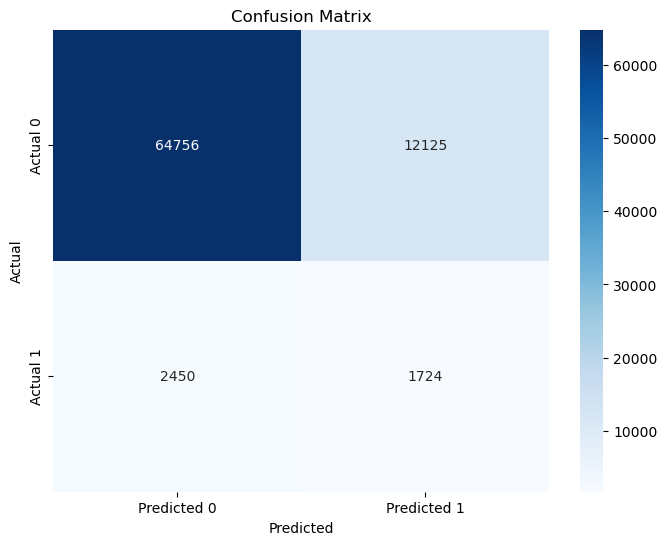

In [220]:
# Create the confusion matrix
cm = confusion_matrix(labels, predlabels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [221]:
from sklearn.metrics import roc_auc_score

In [222]:
roc_auc = roc_auc_score(labels, probs)

print(f"The ROC AUC score is: {roc_auc}")

The ROC AUC score is: 0.7146969513310844


In [223]:
from sklearn.metrics import precision_score, recall_score

In [224]:
precision = precision_score(labels, predlabels)
recall = recall_score(labels, predlabels)

print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.12448552242039136
Recall: 0.41303306181121224


In [225]:
len(test_data)

1940

In [226]:
len(train_neg)

8500

In [227]:
len(train_pos)

2492

In [228]:
len(neg)

37404